In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
df = pd.read_csv(r'/Users/harihara/Desktop/Code/Python/Python_TensorFlow/parkinson_disease.csv')

In [3]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

In [5]:
df.shape

(756, 755)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,125.500000,72.793721,0.000000,62.750000,125.500000,188.250000,251.00000
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [10]:
df = df.groupby('id').mean().reset_index()
df.drop('id', axis=1, inplace=True)

In [11]:
columns = list(df.columns)
for col in columns:
    if col == 'class':
        continue

    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'class')):
            continue

        val = df[col].corr(df[col1])
        if val > 0.7:
            # If the correlation between the two features is more than 0.7, remove it
            columns.remove(col1)
            continue
        else:
            filtered_columns.append(col1)
            
    df = df[filtered_columns]
df.shape

(252, 287)

In [12]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, df['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = df['class']
df = filtered_data
df.shape

/var/folders/6_/7d8kfths3m7d61zkw5p0b6yh0000gn/T/ipykernel_28946/813475410.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['class'] = df['class']


(252, 31)

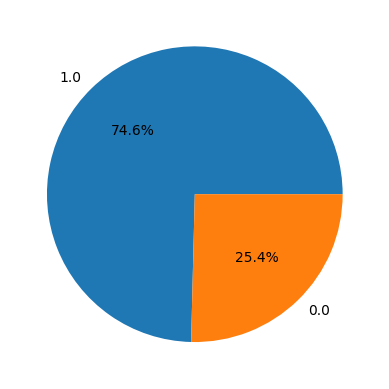

In [13]:
import matplotlib.pyplot as plt

x = df['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
features = df.drop('class', axis=1)
target = df['class']

X_train, X_test,Y_train, Y_test = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=10)

[[ 6  8]
 [ 2 35]]


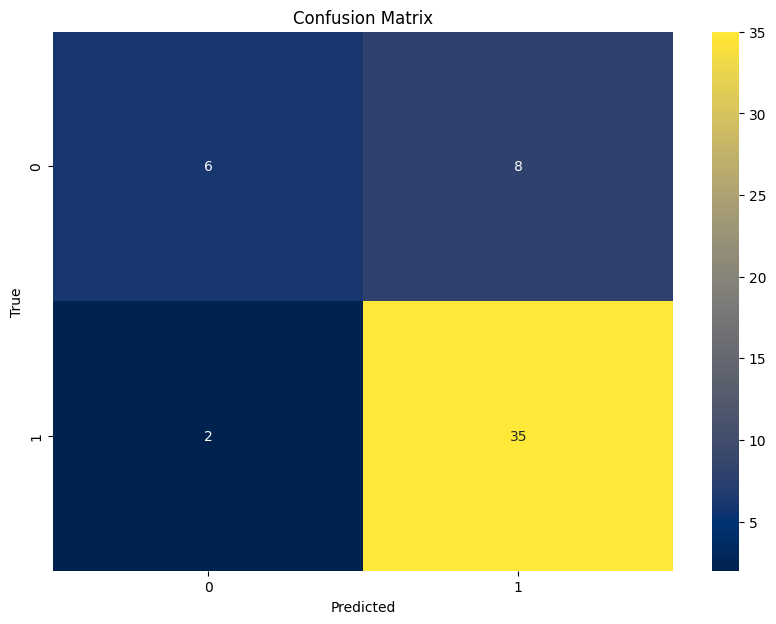

              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55        14
         1.0       0.81      0.95      0.88        37

    accuracy                           0.80        51
   macro avg       0.78      0.69      0.71        51
weighted avg       0.80      0.80      0.78        51

Random Forest Model Accuracy: 0.80


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)
cm1 = confusion_matrix(Y_test, Y_pred)
print(cm1)
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm1, annot=True, fmt='d', cmap='cividis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(Y_test, Y_pred))
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")


In [23]:
cr1 = classification_report(Y_test, Y_pred, output_dict=True)

In [214]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define learning rate
learning_rate = 0.0001

# Build the improved ANN model
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(30,)),
    BatchNormalization(),
    Dropout(0.1),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.1),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.1),

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Class weights to handle imbalance
class_weight = {0: 5.0, 1: 1.0}

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
model.fit(X_train, Y_train,
          epochs=100,
          batch_size=16,
          validation_data=(X_test, Y_test),
          class_weight=class_weight,
          callbacks=[lr_scheduler],
          verbose=1)

# Evaluate the model
train_loss, train_acc, train_auc = model.evaluate(X_train, Y_train, verbose=0)
val_loss, val_acc, val_auc = model.evaluate(X_test, Y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.2f}, AUC: {train_auc:.2f}")
print(f"Validation Accuracy: {val_acc:.2f}, AUC: {val_auc:.2f}")


Epoch 1/100


/Users/harihara/Desktop/Code/Python/Python_TensorFlow/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5124 - auc: 0.5461 - loss: 1.8705 - val_accuracy: 0.2745 - val_auc: 0.6429 - val_loss: 3.0555 - learning_rate: 1.0000e-04
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5168 - auc: 0.5265 - loss: 1.9742 - val_accuracy: 0.2745 - val_auc: 0.6728 - val_loss: 2.0352 - learning_rate: 1.0000e-04
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6097 - auc: 0.6769 - loss: 1.6791 - val_accuracy: 0.3529 - val_auc: 0.6959 - val_loss: 1.5632 - learning_rate: 1.0000e-04
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6252 - auc: 0.6460 - loss: 1.8072 - val_accuracy: 0.4118 - val_auc: 0.6988 - val_loss: 1.2619 - learning_rate: 1.0000e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5499 - auc: 0.6195 - loss: 1.7654 - val_accuracy: 0.4510 - val_auc: 0.7143 - val_loss: 1.0670 - learning_rate: 1.0000e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6153 - auc:

In [20]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model(r'/Users/harihara/Desktop/Code/Python/Python_TensorFlow/parkinsons_model.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[ 9  5]
 [ 7 30]]


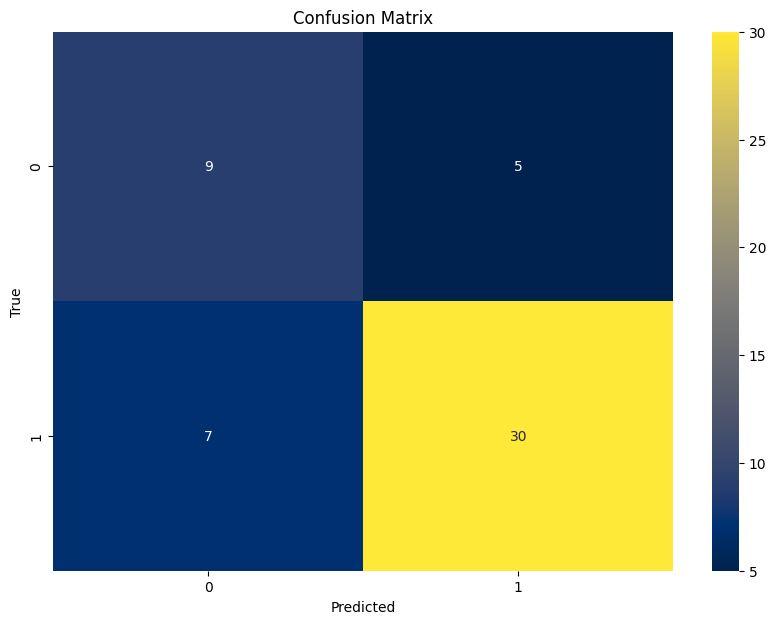

              precision    recall  f1-score   support

         0.0       0.56      0.64      0.60        14
         1.0       0.86      0.81      0.83        37

    accuracy                           0.76        51
   macro avg       0.71      0.73      0.72        51
weighted avg       0.78      0.76      0.77        51



In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Convert predictions to binary labels
predictions = (model.predict(X_test) > 0.5).astype(int)

# Printing the confusion matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing the classification report
print(classification_report(Y_test, predictions))
cr2 = classification_report(Y_test, predictions, output_dict=True)

In [216]:
model.save('parkinsons_model.h5')

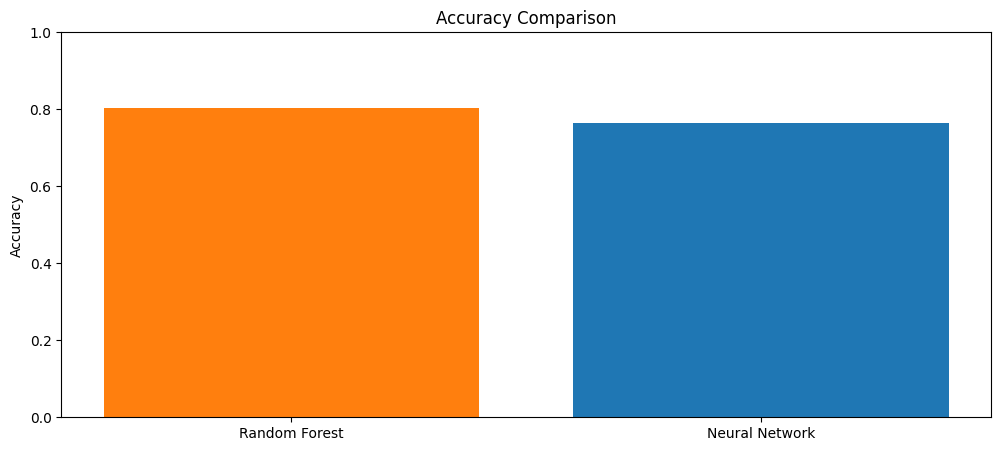

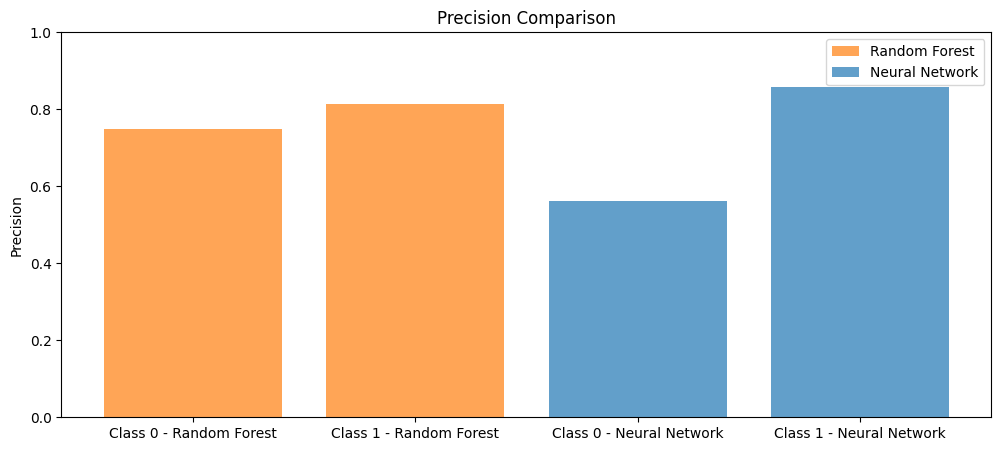

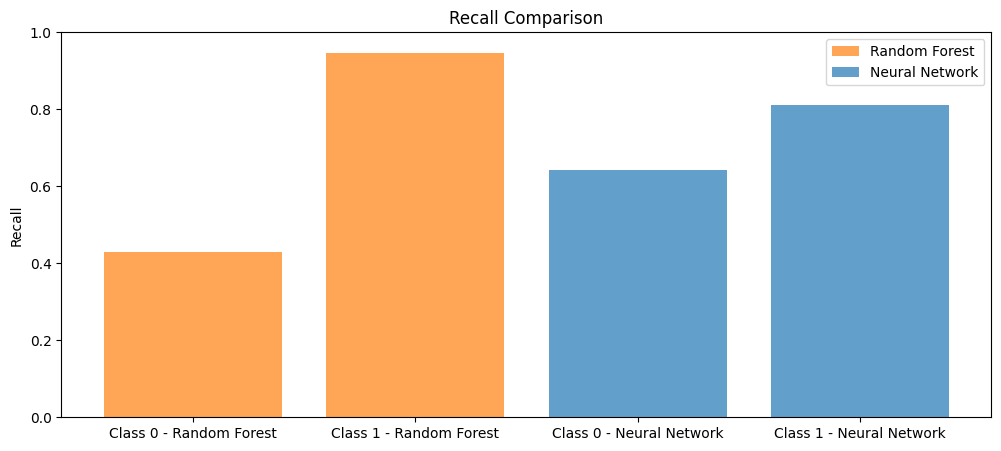

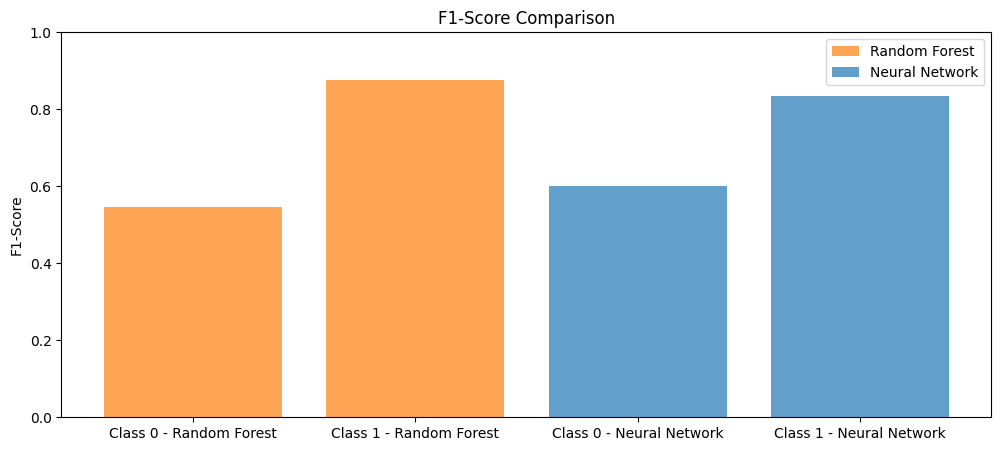

In [28]:
import matplotlib.pyplot as plt
import numpy as np


accuracy_rf = cr1['accuracy']
precision_class_0_rf = cr1['0.0']['precision']
precision_class_1_rf = cr1['1.0']['precision']
recall_class_0_rf = cr1['0.0']['recall']
recall_class_1_rf = cr1['1.0']['recall']
f1_class_0_rf = cr1['0.0']['f1-score']
f1_class_1_rf = cr1['1.0']['f1-score']


accuracy_nn = cr2['accuracy']
precision_class_0_nn = cr2['0.0']['precision']
precision_class_1_nn = cr2['1.0']['precision']
recall_class_0_nn = cr2['0.0']['recall']
recall_class_1_nn = cr2['1.0']['recall']
f1_class_0_nn = cr2['0.0']['f1-score']
f1_class_1_nn = cr2['1.0']['f1-score']

# Accuracy Comparison Plot
plt.figure(figsize=(12, 5))
plt.bar(['Random Forest', 'Neural Network'], [accuracy_rf, accuracy_nn], color=['#ff7f0e', '#1f77b4'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Precision Comparison (Class 0 & Class 1) for Random Forest and Neural Network
plt.figure(figsize=(12, 5))
plt.bar(['Class 0 - Random Forest', 'Class 1 - Random Forest'], [precision_class_0_rf, precision_class_1_rf], color='#ff7f0e', alpha=0.7, label='Random Forest')
plt.bar(['Class 0 - Neural Network', 'Class 1 - Neural Network'], [precision_class_0_nn, precision_class_1_nn], color='#1f77b4', alpha=0.7, label='Neural Network')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Recall Comparison (Class 0 & Class 1) for Random Forest and Neural Network
plt.figure(figsize=(12, 5))
plt.bar(['Class 0 - Random Forest', 'Class 1 - Random Forest'], [recall_class_0_rf, recall_class_1_rf], color='#ff7f0e', alpha=0.7, label='Random Forest')
plt.bar(['Class 0 - Neural Network', 'Class 1 - Neural Network'], [recall_class_0_nn, recall_class_1_nn], color='#1f77b4', alpha=0.7, label='Neural Network')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.legend()
plt.show()

# F1-Score Comparison (Class 0 & Class 1) for Random Forest and Neural Network
plt.figure(figsize=(12, 5))
plt.bar(['Class 0 - Random Forest', 'Class 1 - Random Forest'], [f1_class_0_rf, f1_class_1_rf], color='#ff7f0e', alpha=0.7, label='Random Forest')
plt.bar(['Class 0 - Neural Network', 'Class 1 - Neural Network'], [f1_class_0_nn, f1_class_1_nn], color='#1f77b4', alpha=0.7, label='Neural Network')
plt.title('F1-Score Comparison')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.legend()
plt.show()
